In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset


In [53]:
dataset = pd.read_csv("occupancy.csv")
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [54]:
X = dataset[['CO2', 'Light','Humidity']].values
y = dataset[['Occupancy']].values

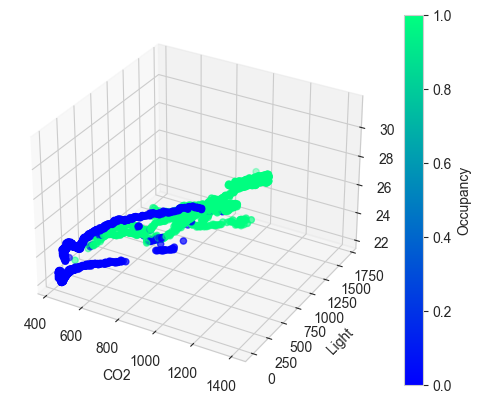

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
scatter = ax.scatter(dataset['CO2'], dataset['Light'], dataset['Humidity'], c=dataset['Occupancy'], cmap='winter')

# Adding labels
ax.set_xlabel('CO2')
ax.set_ylabel('Light')
ax.set_zlabel('Humidity')

# Adding a color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Occupancy')

plt.show()


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### 2. Modèle


In [59]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [60]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [61]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût 


In [62]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient


In [63]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [64]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction


In [65]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 6. modele final

In [66]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

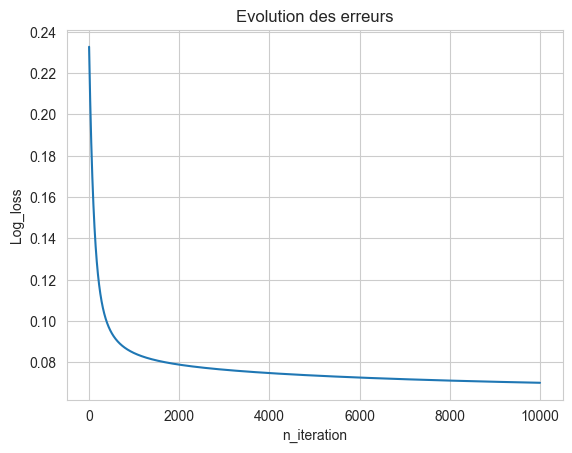

In [67]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [68]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[9.93020551e-01]
 [9.98611397e-01]
 [6.71010421e-04]
 [9.95183628e-01]
 [1.00446879e-02]
 [6.63007031e-03]
 [5.69305541e-04]
 [6.56146643e-04]
 [6.07328782e-04]
 [9.90893290e-01]
 [9.79953346e-01]
 [9.82881277e-01]
 [9.88756670e-01]
 [6.25088519e-04]
 [9.69835078e-01]
 [6.73117041e-04]
 [2.41081552e-03]
 [2.00103406e-02]
 [1.82439992e-03]
 [2.60307907e-03]
 [7.47542716e-04]
 [5.60800052e-04]
 [2.47843604e-03]
 [2.02198813e-03]
 [9.92352340e-01]
 [5.94870227e-04]
 [8.00967563e-01]
 [4.20105690e-03]
 [8.43827882e-01]
 [9.81896582e-01]
 [6.42648840e-04]
 [9.95774471e-01]
 [1.55357518e-03]
 [9.82944654e-01]
 [6.60368244e-04]
 [7.95685997e-04]
 [9.86002131e-01]
 [9.78679989e-01]
 [9.93153123e-01]
 [9.83148745e-01]
 [2.60422002e-03]
 [5.94839697e-04]
 [7.79328377e-04]
 [2.99741508e-03]
 [9.98863502e-04]
 [1.87970171e-03]
 [9.85735913e-01]
 [1.51477722e-03]
 [5.66536516e-04]
 [3.15429519e-03]
 [7.00261875e-04]
 [8.85550563e-01]
 [9.90041715e-01]
 [2.63192623e-03]
 [3.31341792e-03]
 [9.840515

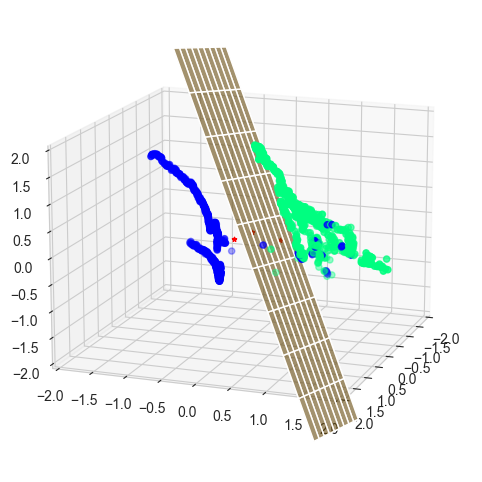

In [75]:
# Générer les données pour la frontière de décision
x1 = np.linspace(-0.5, 1.5, 10)
x2 = np.linspace(-0.5, 1.5, 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W[0]*x1 - W[1]*x2 - b) / W[2]

# Visualiser le dataset et la frontière de décision en 3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='winter')


ax.plot_surface(x1, x2, x3, alpha=0.2,)
ax.plot_surface(x1, x2, x3, alpha=0.5, color='orange')

# Prédire la classe de nouveaux éléments
new_1 = np.array([0.1, 0.1, 0.1])
new_2 = np.array([0.8, 0.1, 0.2])
new_3 = np.array([0.9, 0.8, 0.3])
ax.scatter(new_1[0], new_1[1], new_1[2], c='r', marker='*', s=10)
ax.scatter(new_2[0], new_2[1], new_2[2], c='r', marker='*', s=10)
ax.scatter(new_3[0], new_3[1], new_3[2], c='r', marker='*', s=10)

# Définir les limites des axes pour zoomer
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Définir la position de la caméra pour un meilleur angle de vue
ax.view_init(elev=15, azim=20)

plt.show()

In [76]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9.93020551e-01]
 [9.98611397e-01]
 [6.71010421e-04]
 [9.95183628e-01]
 [1.00446879e-02]
 [6.63007031e-03]
 [5.69305541e-04]
 [6.56146643e-04]
 [6.07328782e-04]
 [9.90893290e-01]
 [9.79953346e-01]
 [9.82881277e-01]
 [9.88756670e-01]
 [6.25088519e-04]
 [9.69835078e-01]
 [6.73117041e-04]
 [2.41081552e-03]
 [2.00103406e-02]
 [1.82439992e-03]
 [2.60307907e-03]
 [7.47542716e-04]
 [5.60800052e-04]
 [2.47843604e-03]
 [2.02198813e-03]
 [9.92352340e-01]
 [5.94870227e-04]
 [8.00967563e-01]
 [4.20105690e-03]
 [8.43827882e-01]
 [9.81896582e-01]
 [6.42648840e-04]
 [9.95774471e-01]
 [1.55357518e-03]
 [9.82944654e-01]
 [6.60368244e-04]
 [7.95685997e-04]
 [9.86002131e-01]
 [9.78679989e-01]
 [9.93153123e-01]
 [9.83148745e-01]
 [2.60422002e-03]
 [5.94839697e-04]
 [7.79328377e-04]
 [2.99741508e-03]
 [9.98863502e-04]
 [1.87970171e-03]
 [9.85735913e-01]
 [1.51477722e-03]
 [5.66536516e-04]
 [3.15429519e-03]
 [7.00261875e-04]
 [8.85550563e-01]
 [9.90041715e-01]
 [2.63192623e-03]
 [3.31341792e-03]
 [9.840515

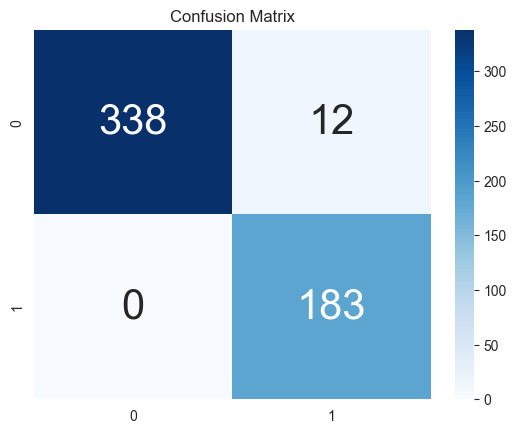

In [77]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [78]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[9.90308355e-01]
 [2.86537735e-03]
 [1.72915813e-02]
 ...
 [8.79701233e-01]
 [9.92217462e-01]
 [6.71932445e-04]]
[[1300   43]
 [   3  786]]


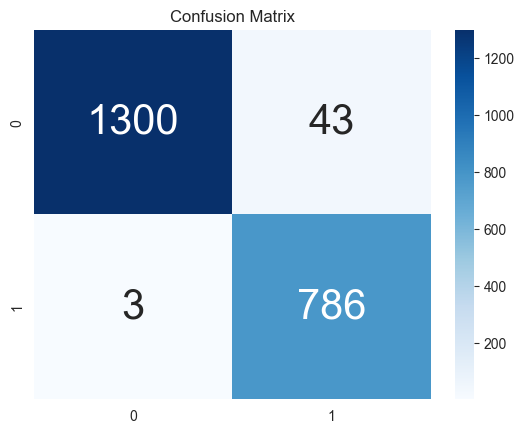

In [79]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()